In [1]:
# package library

library(tidyverse)
library(data.table)
library(readxl)
library(gridExtra)
library(reshape2)
library(agricolae)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# 코로나 전후의 소비자 심리지수 비교

In [2]:
customer <- read_excel("월별소비자동향조사_201801_202010.xlsx")

In [3]:
CCSI <- customer %>% 
  filter(customer$지수코드별 == "소비자심리지수") %>% 
  select(-c("항목","단위","분류코드별")) %>% 
  melt(id.vars = "지수코드별")

# before covid
CCSI_bf <- CCSI[1:25,2:3]

# after covid
CCSI_af <- CCSI[26:34,2:3]

In [4]:
var.test(CCSI_bf$value,CCSI_af$value)


	F test to compare two variances

data:  CCSI_bf$value and CCSI_af$value
F = 0.34676, num df = 24, denom df = 8, p-value = 0.04228
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08784894 0.96369032
sample estimates:
ratio of variances 
         0.3467591 


In [5]:
t.test(CCSI_bf$value,CCSI_af$value, var.equal = FALSE, alternative = "greater")


	Welch Two Sample t-test

data:  CCSI_bf$value and CCSI_af$value
t = 6.291, df = 10.07, p-value = 4.371e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 12.63044      Inf
sample estimates:
mean of x mean of y 
100.94800  83.21111 


# 연령별 데이터 전처리

In [6]:
category <- c("가계수입전망CSI","현재가계저축CSI","가계저축전망CSI",
              "주택가격전망CSI","소비지출전망CSI",
              "의료·보건비 지출전망CSI","교양·오락·문화생활비 지출전망CSI",
              "의류비 지출전망CSI","외식비 지출전망CSI","여행비 지출전망CSI", 
              "교육비 지출전망CSI")

In [7]:
customer_age <- customer %>% 
    select(-c("항목","단위")) %>% 
    filter(grepl('세+',분류코드별)) %>% 
    mutate(지수코드별 = as.factor(지수코드별), 분류코드별 = as.factor(분류코드별))

customer_age$분류코드별 <- relevel(customer_age$분류코드별, "40세미만")

customer_base <- customer_age[1:2]
bf_age <- customer_age[3:27]
af_age <- customer_age[28:36]

bf_age <- customer_base %>% bind_cols(bf_age)
af_age <- customer_base %>% bind_cols(af_age)

bf_age <- bf_age %>% cbind(data.frame(평균 = apply(bf_age[, 3:27], 1, mean)))
af_age <- af_age %>% cbind(data.frame(평균 = apply(af_age[, 3:11], 1, mean)))

In [8]:
head(bf_age)

지수코드별,분류코드별,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,...,2019. 05 월,2019. 06 월,2019. 07 월,2019. 08 월,2019. 09 월,2019. 10 월,2019. 11 월,2019. 12 월,2020. 01 월,평균
현재생활형편CSI,40세미만,96,98,99,100,98,99,93,92,...,95,95,95,95,97,96,95,96,97,95.92
현재생활형편CSI,40-50세,96,93,96,95,96,94,94,90,...,93,92,93,92,94,94,95,94,96,93.68
현재생활형편CSI,50-60세,93,95,95,94,95,92,90,87,...,89,89,88,88,89,90,90,89,91,89.68
현재생활형편CSI,60-70세,91,91,93,90,93,90,87,84,...,87,91,89,86,86,87,89,90,90,88.76
현재생활형편CSI,70세이상,87,90,87,87,89,88,88,85,...,90,87,87,87,91,87,88,88,88,88.12
현재경기판단CSI,40세미만,93,94,93,95,97,95,86,77,...,79,79,78,71,79,81,83,82,84,82.12


In [9]:
head(af_age)

지수코드별,분류코드별,2020. 02 월,2020. 03 월,2020. 04 월,2020. 05 월,2020. 06 월,2020. 07 월,2020. 08 월,2020. 09 월,2020. 10 월,평균
현재생활형편CSI,40세미만,96,90,87,87,90,90,91,87,92,90.00000
현재생활형편CSI,40-50세,96,85,77,81,86,87,86,83,89,85.55556
현재생활형편CSI,50-60세,90,79,73,74,77,82,83,78,83,79.88889
현재생활형편CSI,60-70세,85,79,73,76,81,82,83,77,81,79.66667
현재생활형편CSI,70세이상,84,77,71,77,84,84,81,77,80,79.44444
현재경기판단CSI,40세미만,76,42,37,41,48,53,59,44,63,51.44444


# 소득별 데이터 전처리

In [10]:
customer_wage <- customer %>% 
    select(-c("항목","단위")) %>% 
    filter(grepl('만원+',분류코드별)) %>% 
    mutate(지수코드별 = as.factor(지수코드별), 분류코드별 = as.factor(분류코드별))

customer_wage$분류코드별 <- relevel(customer_wage$분류코드별,"100만원미만")

customer_base <- customer_wage[1:2]
bf_wage <- customer_wage[3:27]
af_wage <- customer_wage[28:36]

bf_wage <- customer_base %>% bind_cols(bf_wage)
af_wage <- customer_base %>% bind_cols(af_wage)

bf_wage <- bf_wage %>% cbind(data.frame(평균 = apply(bf_wage[, 3:27], 1, mean)))
af_wage <- af_wage %>% cbind(data.frame(평균 = apply(af_wage[, 3:11], 1, mean)))

In [11]:
head(bf_wage)

지수코드별,분류코드별,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,2018. 07 월,2018. 08 월,...,2019. 05 월,2019. 06 월,2019. 07 월,2019. 08 월,2019. 09 월,2019. 10 월,2019. 11 월,2019. 12 월,2020. 01 월,평균
현재생활형편CSI,100만원미만,80,83,85,77,80,85,77,80,...,78,83,81,81,84,80,84,81,81,81.00
현재생활형편CSI,100-200만원,83,80,84,88,88,88,86,79,...,85,87,87,84,86,85,87,86,86,85.68
현재생활형편CSI,200-300만원,89,91,92,88,90,88,86,84,...,88,89,87,87,87,91,90,89,90,88.48
현재생활형편CSI,300-400만원,94,93,93,95,95,92,90,87,...,89,89,89,89,90,89,90,89,91,90.12
현재생활형편CSI,400-500만원,98,95,100,100,99,98,94,93,...,95,94,92,92,94,92,93,95,96,94.80
현재생활형편CSI,500만원이상,103,106,104,103,103,102,100,97,...,99,98,98,97,99,99,98,99,100,99.24


In [12]:
head(af_wage)

지수코드별,분류코드별,2020. 02 월,2020. 03 월,2020. 04 월,2020. 05 월,2020. 06 월,2020. 07 월,2020. 08 월,2020. 09 월,2020. 10 월,평균
현재생활형편CSI,100만원미만,80,70,61,69,71,68,71,64,69,69.22222
현재생활형편CSI,100-200만원,82,74,67,71,79,80,78,75,79,76.11111
현재생활형편CSI,200-300만원,87,79,70,75,81,82,80,73,82,78.77778
현재생활형편CSI,300-400만원,87,79,78,78,79,82,82,79,81,80.55556
현재생활형편CSI,400-500만원,95,87,82,81,87,87,89,86,91,87.22222
현재생활형편CSI,500만원이상,101,92,86,88,92,94,93,90,95,92.33333


# 그래프 함수 정의 및 그래프 출력

In [13]:
draw_bargraph = function(before, after, category) {
  before <- before %>% 
    filter(지수코드별 %in% category)
  after <- after %>%
    filter(지수코드별 %in% category)
  
  bf_hal <- before %>% mutate(group = "이전") %>%
    select(c("지수코드별","분류코드별","평균","group"))
  af_hal <- after %>% mutate(group = "이후") %>% 
    select(c("지수코드별","분류코드별","평균","group"))
  
  df <- bf_hal %>% bind_rows(af_hal)
  graph = ggplot(df , aes(x = 분류코드별, y = 평균, fill = group)) + 
    geom_bar(stat = "identity",position = "dodge") +
    labs(x = "Category", y = "CSI평균") +
    theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ggtitle(category) + 
    coord_cartesian(ylim = c(min(df$평균) - 10, max(df$평균) + 10))
  
  return(graph)
}

In [14]:
category_age = c('가계수입전망CSI', '의료·보건비 지출전망CSI',
                 '가계저축전망CSI', '주택가격전망CSI',
                 '여행비 지출전망CSI', '교육비 지출전망CSI')

category_wage = c('가계수입전망CSI', '가계저축전망CSI',
                  '주택가격전망CSI', '여행비 지출전망CSI',
                  '의료·보건비 지출전망CSI','교양·오락·문화생활비 지출전망CSI')

age_graph_list <- list()
wage_graph_list <- list()

for (i in 1:length(category_age)){
  age_graph_list[[i]] = draw_bargraph(bf_age, af_age, category_age[i])
}

for (i in 1:length(category_wage)){
  wage_graph_list[[i]] = draw_bargraph(bf_wage, af_wage, category_wage[i])
}

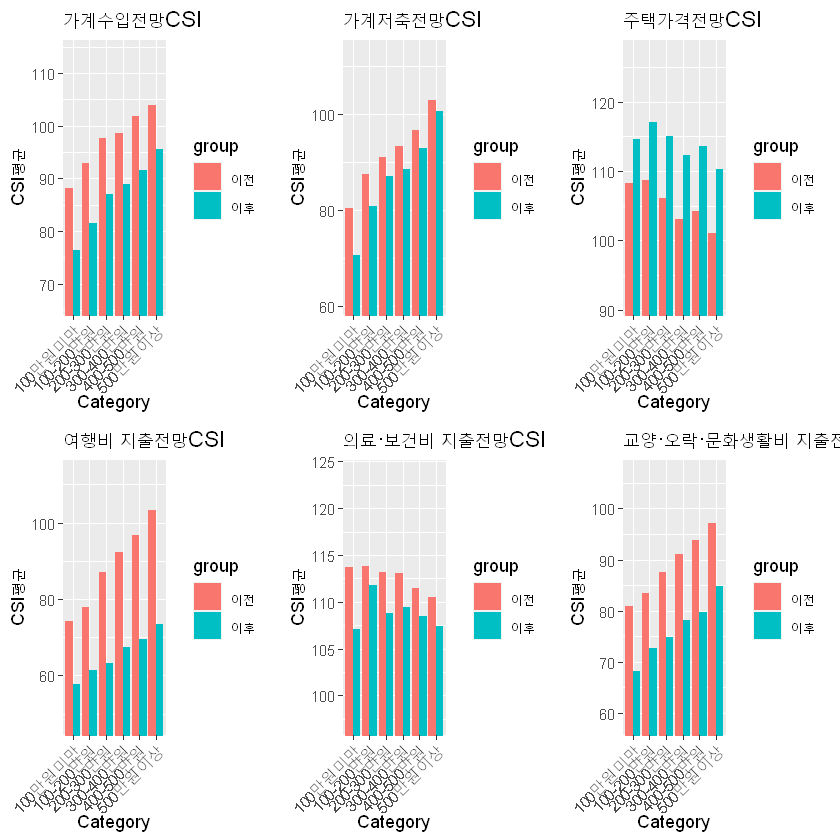

In [15]:
do.call("grid.arrange", c(wage_graph_list, ncol=3, nrow=2))

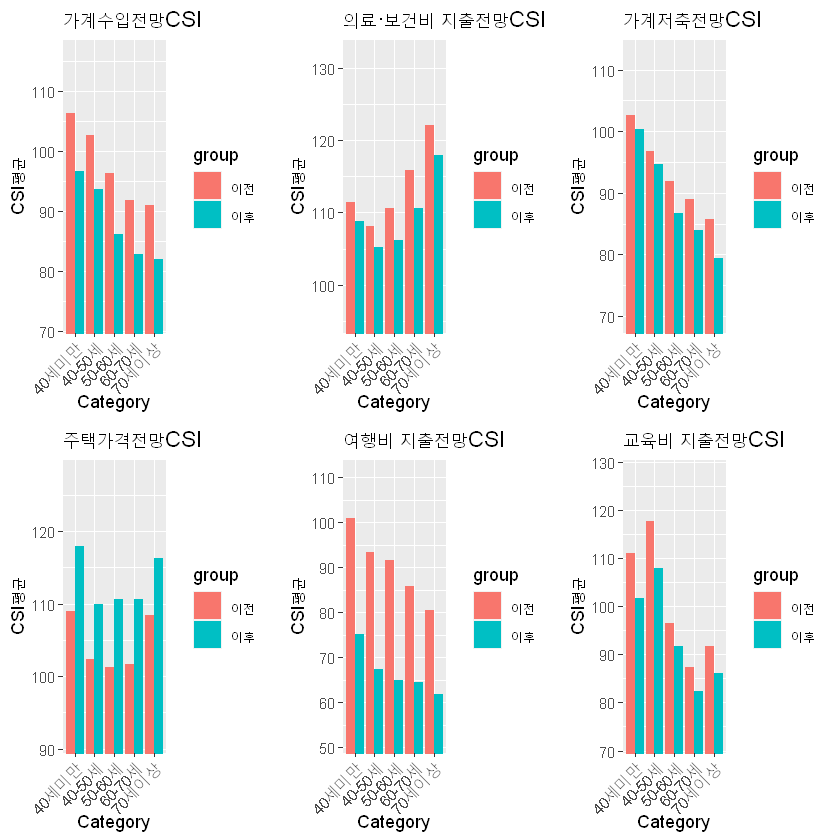

In [16]:
do.call("grid.arrange", c(age_graph_list, ncol=3, nrow=2))

# category별로 분산분석해서 저장하는 함수 정의

In [17]:
anova_result = function(df, category) {
  
  aov_list = list()
  summary_list = list()
  posthoc_list = list()
  
  for (i in 1:length(category)){
    aov_model = aov(value ~ 분류코드별 + variable,
                    data=df[df$지수코드별 == category[i], ])
    aov_list[[i]] = aov_model

    summary_list[[i]] = summary(aov_model)
    
    posthoc = HSD.test(aov_model, '분류코드별', group=TRUE)
    posthoc_list[[i]] = posthoc
  }
  
  return(list('aov' = aov_list, 'summary' = summary_list, 'posthoc' = posthoc_list))
  
}

# 연령별 CSI 분산분석

In [18]:
category_age = c('가계수입전망CSI', '의료·보건비 지출전망CSI',
                 '가계저축전망CSI', '주택가격전망CSI',
                 '여행비 지출전망CSI', '교육비 지출전망CSI')

data2 <- customer %>%
  filter(grepl('세+',분류코드별)) %>% 
  filter(지수코드별 %in% category) %>% 
  select(-항목, -단위) %>% 
  melt(id.vars=c('지수코드별', '분류코드별')) %>% 
  mutate(지수코드별 = as.factor(지수코드별), 분류코드별 = as.factor(분류코드별))

data2_b <- data2[c(1:1375), ]
data2_a <- data2[c(1376:1870), ]

In [19]:
anova_result_before = anova_result(df=data2_b, category=category_age)
anova_result_after = anova_result(df=data2_a, category=category_age)

In [20]:
for (i in 1:length(category_age)){
  cat('\n--------------------', category_age[i], '에 대한 분산분석 결과입니다.--------------------\n\n')
  print(anova_result_before$summary[[i]])
  print(anova_result_before$posthoc[[i]])
  print(anova_result_after$summary[[i]])
  print(anova_result_after$posthoc[[i]])
}


-------------------- 가계수입전망CSI 에 대한 분산분석 결과입니다.--------------------

            Df Sum Sq Mean Sq F value   Pr(>F)    
분류코드별   4   4480  1119.9 352.164  < 2e-16 ***
variable    24    610    25.4   7.993 4.68e-14 ***
Residuals   96    305     3.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
$statistics
  MSerror Df  Mean       CV      MSD
     3.18 96 97.56 1.827855 1.402332

$parameters
   test     name.t ntr StudentizedRange alpha
  Tukey 분류코드별   5         3.931944  0.05

$means
          value      std  r Min Max Q25 Q50 Q75
40-50세  102.56 2.501333 25  98 108 101 103 104
40세미만 106.24 2.026491 25 103 112 105 106 107
50-60세   96.28 3.553402 25  91 105  94  95  98
60-70세   91.76 3.112876 25  87  98  89  91  95
70세이상  90.96 2.335951 25  87  95  89  91  93

$comparison
NULL

$groups
          value groups
40세미만 106.24      a
40-50세  102.56      b
50-60세   96.28      c
60-70세   91.76      d
70세이상  90.96      d

attr(,"class")
[1] "group"
       

# 소득수준별 CSI 분산분석

In [21]:
category_wage = c('가계수입전망CSI',
                  '가계저축전망CSI', '주택가격전망CSI',
                  '여행비 지출전망CSI', '의료·보건비 지출전망CSI','교양·오락·문화생활비 지출전망CSI')

data_wage <- customer %>%
  filter(grepl('만원+',분류코드별)) %>% 
  filter(지수코드별 %in% category) %>% 
  select(-항목, -단위) %>% 
  melt(id.vars=c('지수코드별', '분류코드별')) %>% 
  mutate(지수코드별 = as.factor(지수코드별), 분류코드별 = as.factor(분류코드별))

data_wage_b <- data_wage[c(1:1650), ]
data_wage_a <- data_wage[c(1651:2244), ]

In [22]:
anova_result_before_wage = anova_result(df = data_wage_b, category = category_wage)
anova_result_after_wage = anova_result(df = data_wage_a, category = category_wage)

In [23]:
for (i in 1:length(category_wage)){
  cat('\n--------------------', category_age[i], '에 대한 분산분석 결과입니다.--------------------\n\n')
  print(anova_result_before_wage$summary[[i]])
  print(anova_result_before_wage$posthoc[[i]])
  print(anova_result_after_wage$summary[[i]])
  print(anova_result_after_wage$posthoc[[i]])
}


-------------------- 가계수입전망CSI 에 대한 분산분석 결과입니다.--------------------

             Df Sum Sq Mean Sq F value   Pr(>F)    
분류코드별    5   4206   841.2 197.037  < 2e-16 ***
variable     24    826    34.4   8.066 1.33e-15 ***
Residuals   120    512     4.3                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
$statistics
   MSerror  Df     Mean       CV      MSD
  4.269111 120 97.20667 2.125557 1.692611

$parameters
   test     name.t ntr StudentizedRange alpha
  Tukey 분류코드별   6         4.095986  0.05

$means
             value      std  r Min Max Q25 Q50 Q75
100-200만원  92.88 3.004441 25  88 100  91  92  95
100만원미만  88.24 3.205204 25  81  96  87  88  90
200-300만원  97.72 2.491987 25  93 103  96  97  99
300-400만원  98.60 3.366502 25  94 106  96  98 101
400-500만원 101.88 3.395095 25  96 109  99 102 105
500만원이상 103.92 2.722132 25 100 111 102 103 105

$comparison
NULL

$groups
             value groups
500만원이상 103.92      a
400-500만원 101.88      b
300-400만원  98.60